In [1]:
import numpy as np
from pygabor.rectimecausgabor import RecursiveTimeCausGaborMethod
from importlib import reload
from matplotlib import pyplot as plt

In [2]:
#reload(pygabor.rectimecausgabor)

In [3]:
# Generate a temporal signal for testing purposes

Nt = 100
delta_t = 1

time = delta_t * np.linspace(0, Nt-1, Nt)
omega_1 = 2 * np.pi / 20 * time
omega_2 = 2 * np.pi / 10 * time
testsignal = np.zeros(Nt)

testsignal = np.cos(omega_1) + np.cos(omega_2)
#testsignal = np.cos(omega_1)
#testsignal = np.cos(omega_2)

print(testsignal)


[ 2.          1.76007351  1.11803399  0.27876826 -0.5        -1.
 -1.11803399 -0.89680225 -0.5        -0.14203952  0.         -0.14203952
 -0.5        -0.89680225 -1.11803399 -1.         -0.5         0.27876826
  1.11803399  1.76007351  2.          1.76007351  1.11803399  0.27876826
 -0.5        -1.         -1.11803399 -0.89680225 -0.5        -0.14203952
  0.         -0.14203952 -0.5        -0.89680225 -1.11803399 -1.
 -0.5         0.27876826  1.11803399  1.76007351  2.          1.76007351
  1.11803399  0.27876826 -0.5        -1.         -1.11803399 -0.89680225
 -0.5        -0.14203952  0.         -0.14203952 -0.5        -0.89680225
 -1.11803399 -1.         -0.5         0.27876826  1.11803399  1.76007351
  2.          1.76007351  1.11803399  0.27876826 -0.5        -1.
 -1.11803399 -0.89680225 -0.5        -0.14203952  0.         -0.14203952
 -0.5        -0.89680225 -1.11803399 -1.         -0.5         0.27876826
  1.11803399  1.76007351  2.          1.76007351  1.11803399  0.27876826
 -

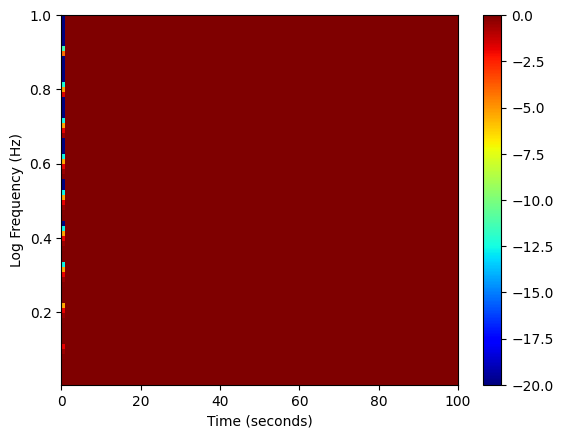

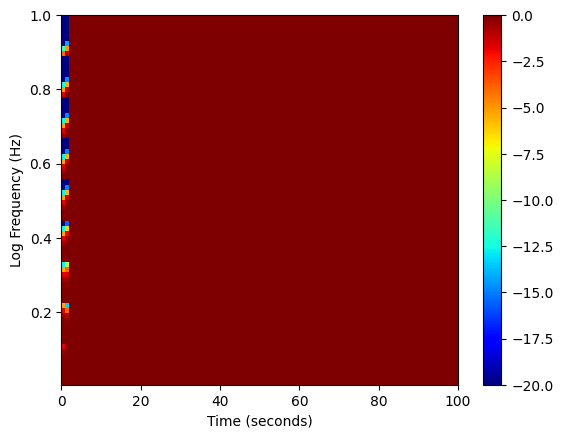

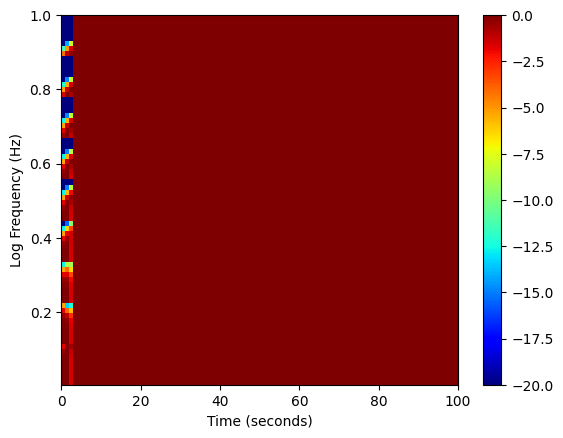

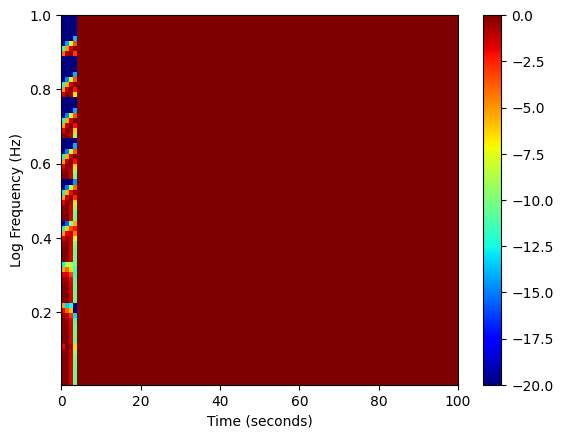

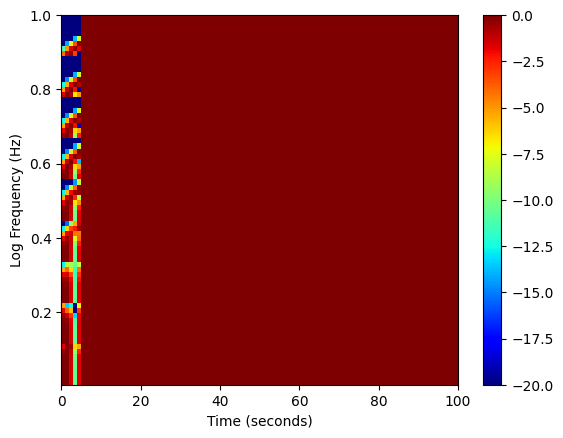

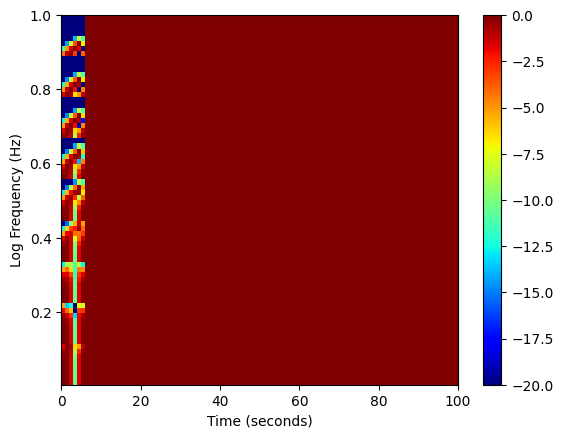

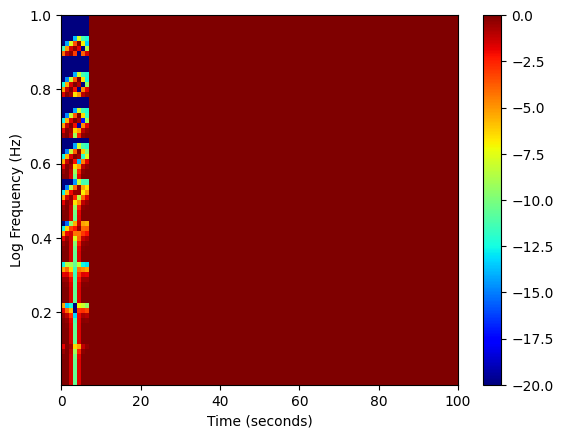

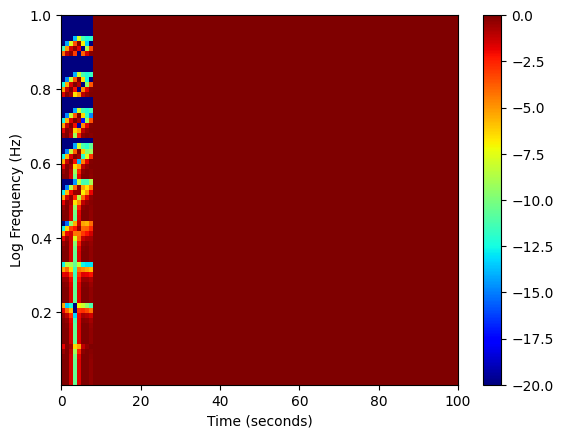

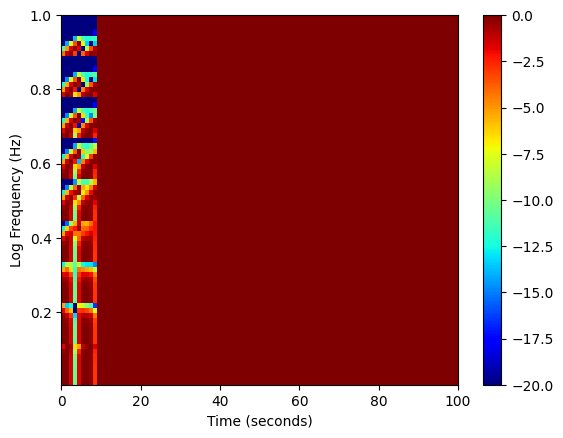

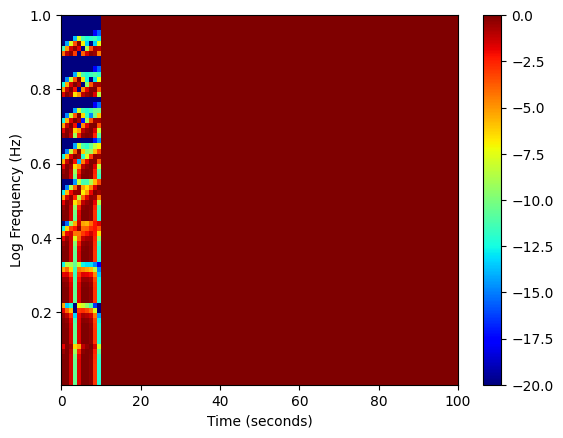

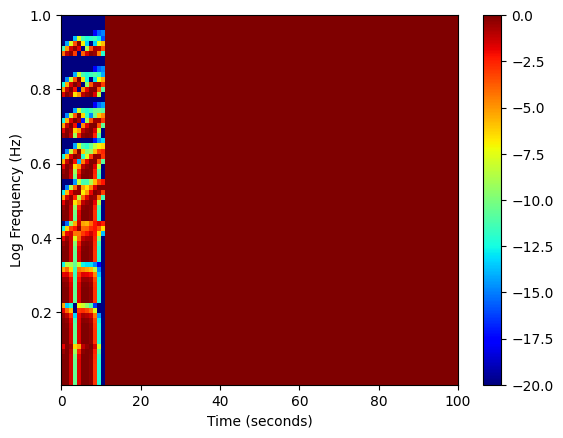

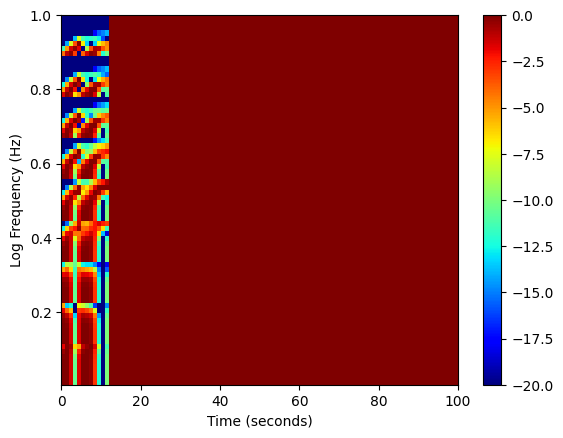

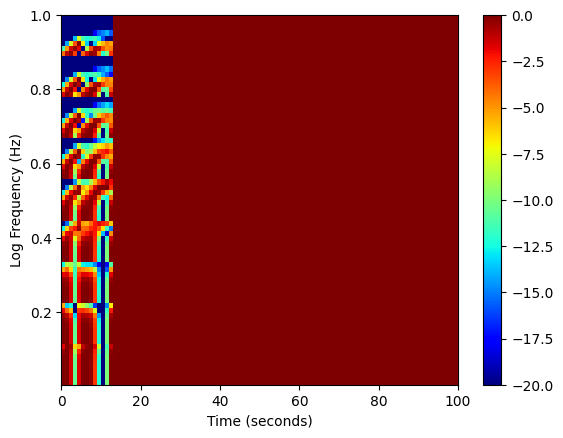

In [ ]:
# Use this function when computing the time-frequency transform at a single temporal scale
omega = 2 * np.pi * np.array([1/1, 1/2, 1/4, 1/8, 1/16, 1/32, 1/64, 1/128, 1/256])
numfreqs = np.size(omega)
numlevels = 8
N = 1.0
c = 2.0
rectimecausgabor = RecursiveTimeCausGaborMethod(omega, delta_t, c, numlevels, N, Nt)

k = 8

levels_arr = np.zeros((numfreqs*numlevels, Nt))

for n in range(Nt):
    levels = rectimecausgabor.process(testsignal[n])
    logspectrogram = rectimecausgabor.spectrogram(lowsoftthresh=0.00001, maxrange = 20)

    flattened_logspectrogram = logspectrogram.flatten()
    
    ind = np.argpartition(flattened_logspectrogram, -k)[-k:] # index of the k highest elements

    levels_arr[ind,n] = 1


(72, 100)


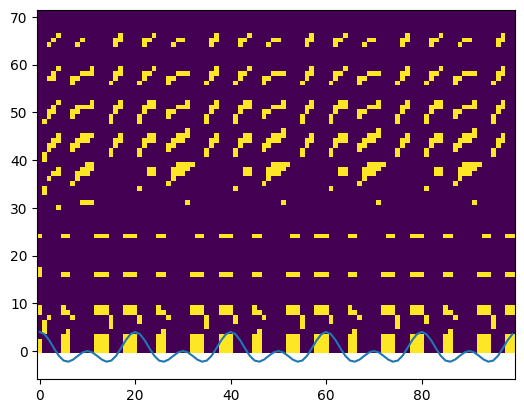

In [ ]:

plt.imshow(levels_arr, origin='lower')
print(levels_arr.shape)
plt.plot(time, 2*testsignal)